In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
pd.set_option("display.max_rows", 101)
pd.set_option('display.max_columns',50)

In [3]:
with open('batting_data.pkl', 'rb') as cellar:
    bat_dict = pickle.load(cellar)

In [4]:
bat_df = bat_dict['LgAvg']

In [5]:
bat_df = bat_df.replace(to_replace='',value=np.nan)

In [6]:
bat_df['Year']=bat_df.index.astype(int)

In [7]:
bat_df = bat_df.astype(float)

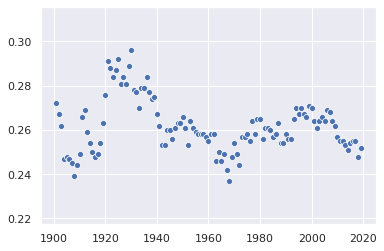

In [8]:
bat_avg = np.array(bat_df['BA'])
year = np.array(bat_df['Year'])
sns.scatterplot(x=year,y=bat_avg)

In [9]:
nu_bat_avg = np.fft.rfft(bat_avg)

This code worked over from
https://glowingpython.blogspot.com/2011/08/how-to-plot-frequency-spectrum-with.html
Most of it is pointless for our purposes.

In [10]:
from scipy import arange
def plotSpectrum(y):
    # ,Fs=1
    """
    Plots a single-sided amplitude spectrum of y(t).
    """
#    Fs is the sampling rate. We are averaging over years,
#    so 1 sample / 1 year seems right. 

#    n = len(y) # length of the signal
#    k = arange(n)
#    T = n/Fs
#    frq = k/T   # two sided frequency range
                # half of those would be negative
#    frq = frq[range(n//2)] # one sided frequency range

    Y = np.abs(np.fft.rfft(y)) # fft computation, real part
    
    sns.scatterplot(x=arange(len(Y)),y=Y) # plotting the spectrum
    plt.xlim(1,20)
    plt.ylim(0,3)
    plt.xlabel('Wavenumber')
    plt.ylabel('Amplitude')
    return Y

/home/paulus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


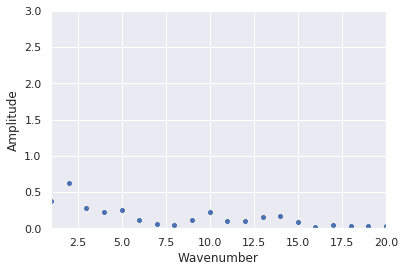

In [11]:
nu_bat_avg = plotSpectrum(bat_avg)

In [12]:
bat_df.columns

Index(['#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'Year'],
      dtype='object')

In [13]:
bat_rate_df = pd.concat([bat_df.Year,bat_df.G,bat_df['R/G']],axis=1)

In [14]:
bat_rate_df['PA/G']=bat_df['PA']/bat_df['G']
bat_rate_df['AB/G']=bat_df['AB']/bat_df['G']
bat_rate_df['H/G']=bat_df['H']/bat_df['G']
bat_rate_df['2B/G']=bat_df['2B']/bat_df['G']
bat_rate_df['3B/G']=bat_df['3B']/bat_df['G']
bat_rate_df['HR/G']=bat_df['HR']/bat_df['G']
bat_rate_df['RBI/G']=bat_df['RBI']/bat_df['G']
bat_rate_df['SB/G']=bat_df['SB']/bat_df['G']
bat_rate_df['CS/G']=bat_df['CS']/bat_df['G']
bat_rate_df['BB/G']=bat_df['BB']/bat_df['G']
bat_rate_df['SO/G']=bat_df['SO']/bat_df['G']
bat_rate_df['BA']=bat_df['BA']
bat_rate_df['OBP']=bat_df['OBP']
bat_rate_df['SLG']=bat_df['SLG']
bat_rate_df['OPS']=bat_df['OPS']
bat_rate_df['OPS+']=bat_df['OPS+']
bat_rate_df['TB/G']=bat_df['TB']/bat_df['G']
bat_rate_df['GDP/G']=bat_df['GDP']/bat_df['G']
bat_rate_df['HBP/G']=bat_df['HBP']/bat_df['G']
bat_rate_df['SH/G']=bat_df['SH']/bat_df['G']
bat_rate_df['SF/G']=bat_df['SF']/bat_df['G']
bat_rate_df['IBB/G']=bat_df['IBB']/bat_df['G']
bat_rate_df['LOB/G']=bat_df['LOB']/bat_df['G']

In [15]:
bat_rate_df.columns

Index(['Year', 'G', 'R/G', 'PA/G', 'AB/G', 'H/G', '2B/G', '3B/G', 'HR/G',
       'RBI/G', 'SB/G', 'CS/G', 'BB/G', 'SO/G', 'BA', 'OBP', 'SLG', 'OPS',
       'OPS+', 'TB/G', 'GDP/G', 'HBP/G', 'SH/G', 'SF/G', 'IBB/G', 'LOB/G'],
      dtype='object')

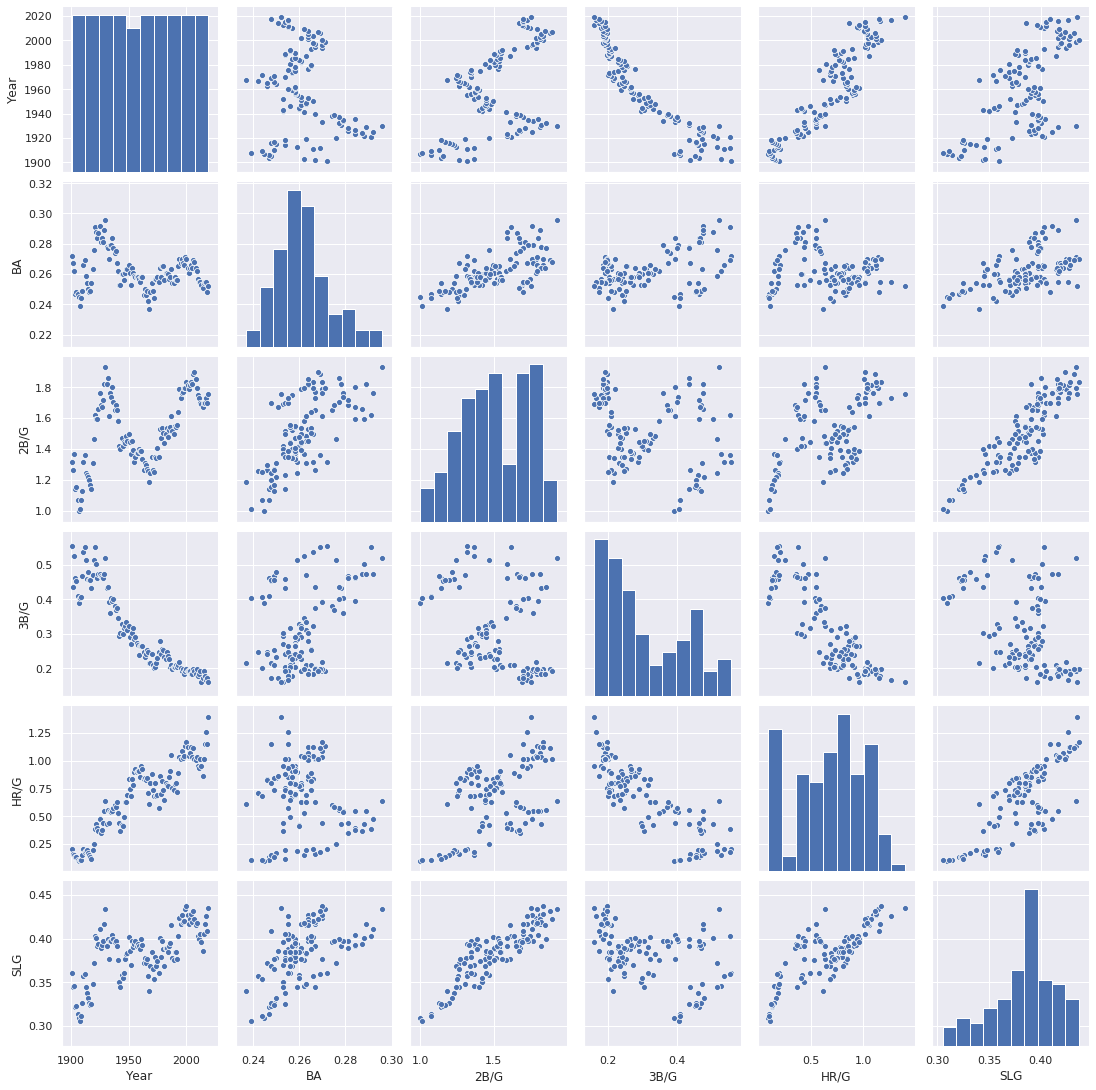

In [16]:
slg_df = pd.concat([bat_rate_df['Year'],bat_rate_df['BA'],bat_rate_df['2B/G']
                    ,bat_rate_df['3B/G'],bat_rate_df['HR/G'],bat_rate_df['SLG']],axis=1)
sns.pairplot(slg_df)

In [17]:
with open('bat_rate_data.pkl', 'wb') as cellar:
    pickle.dump(bat_rate_df, cellar)

Let's visualize in these groups for hitting specifically:
* Contact (H, BA, GDP)
* Power(2B, HR, BB, SO, IBB)

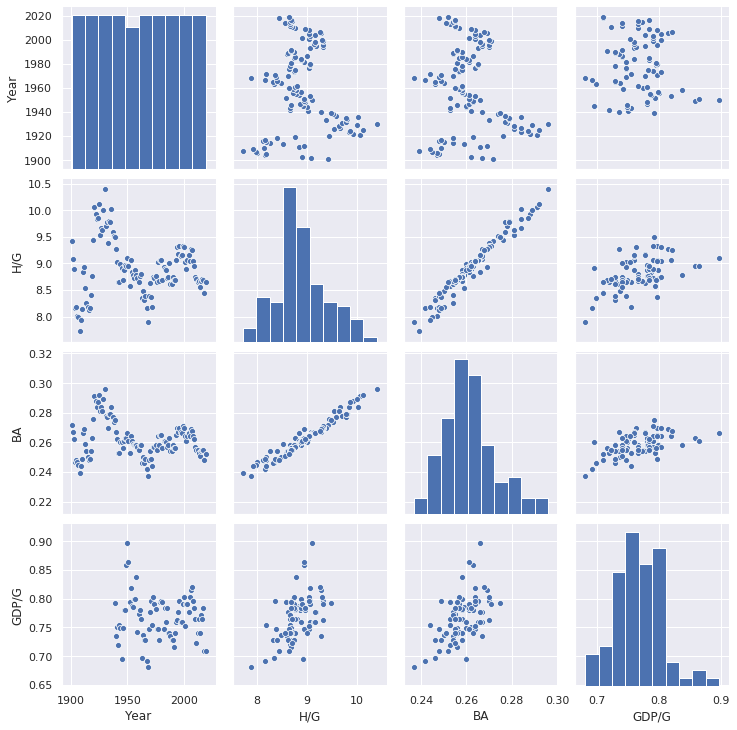

In [18]:
cont_df = pd.concat([bat_rate_df['Year'],bat_rate_df['H/G'],bat_rate_df['BA']
                    ,bat_rate_df['GDP/G']],axis=1)
sns.pairplot(cont_df)

Interesting, had I time, to consider what goes into that noise in GDP/G... how does the "manufacture runs" attitude play into it versus the "three run home run" attitude... but the obvious flagship here is BA.

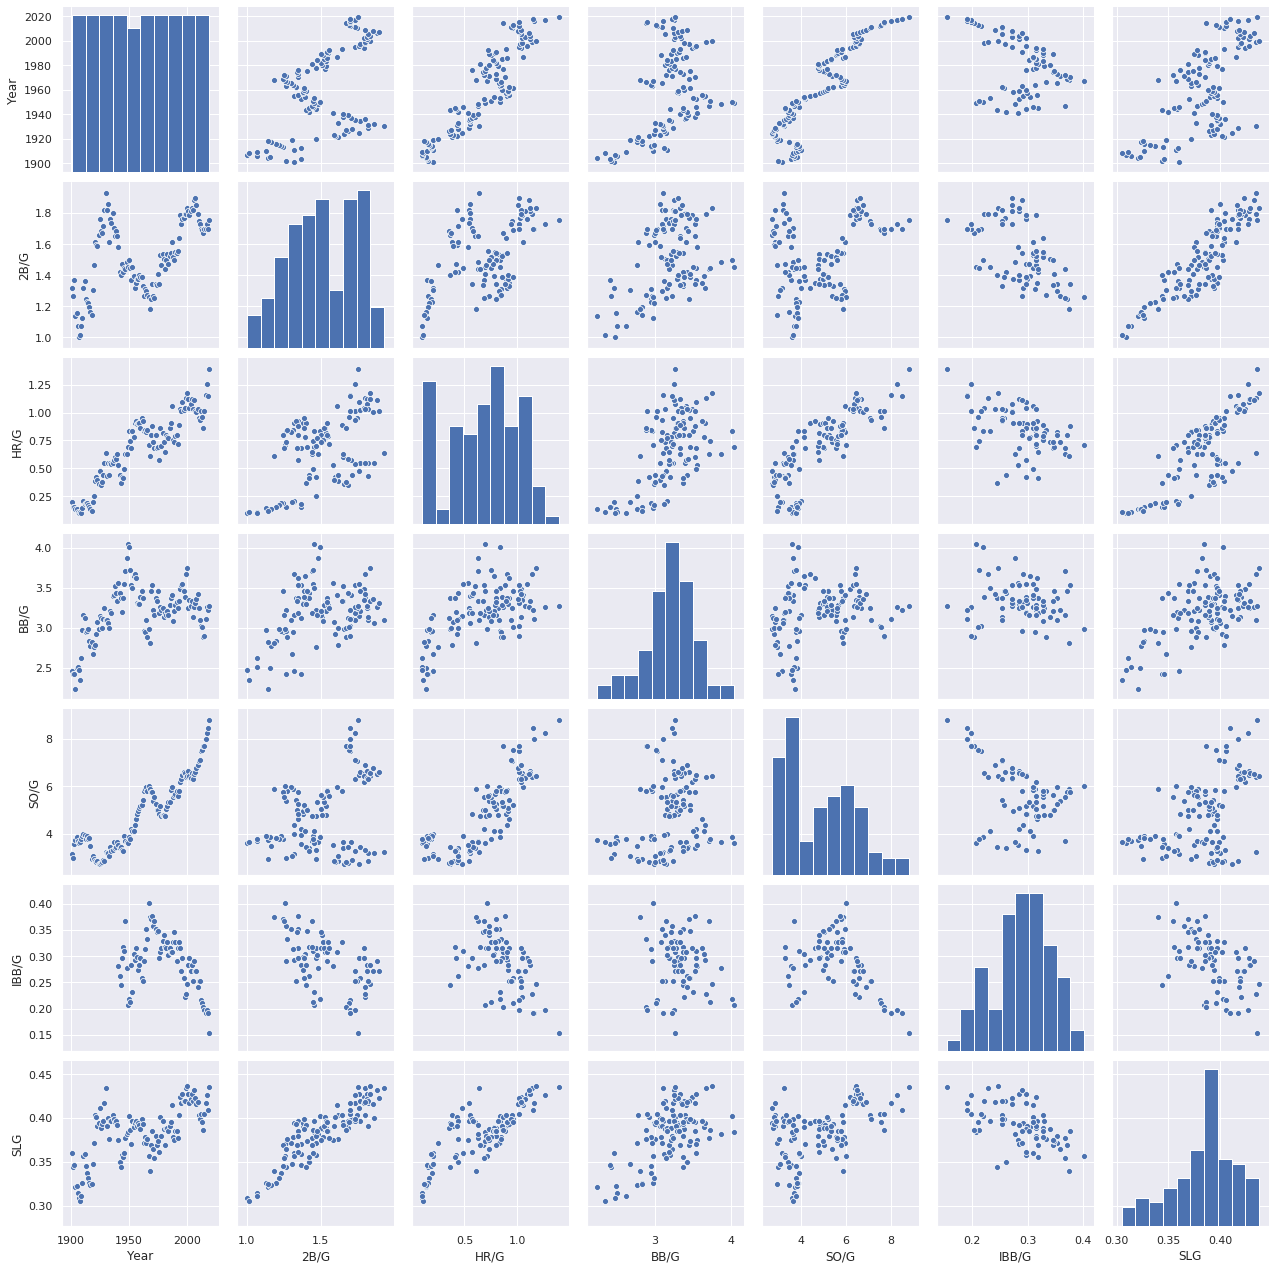

In [19]:
# 2B, HR, BB, SO, IBB
power_df = pd.concat([bat_rate_df['Year'],bat_rate_df['2B/G'],bat_rate_df['HR/G']
                    ,bat_rate_df['BB/G'],bat_rate_df['SO/G'],bat_rate_df['IBB/G']
                      ,bat_rate_df['SLG']],axis=1)
sns.pairplot(power_df)

Interesting. Doubles are more simply correlated with SLG, while HR are more simply correlated with SO. You just don't have years with high strikeouts and low home runs or conversely.

That time series for strikeouts is incredibly tight. It just never shifts randomly; it's always on a trend. That trend is also mostly upward. Perhaps it is one of the best predictive variables. Doubles are also pretty tight and display a complementary trend. Meanwhile, HR have been on an overall positive trend throughout the modern history of the game.

I thought there would be a positive correlation between IBB and SLG, HR, but 1) perhaps it is an effective intervention... I mean, it does prevent those from happening, and 2) wow, look at that downward trend. Managers are either deciding of themselves to stop handing out free passes or else they're actually listening to the statheads.

Now it's time for speed stats.

'SB/G', 'CS/G', '3B/G'

I mean, are there any others?

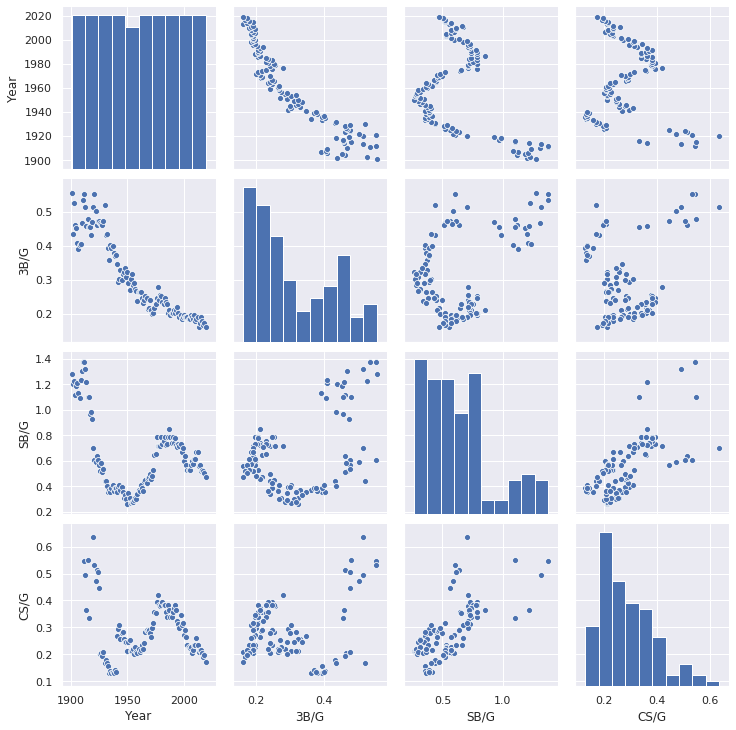

In [20]:
sp_df = pd.concat([bat_rate_df['Year'],bat_rate_df['3B/G'],
                   bat_rate_df['SB/G'],bat_rate_df['CS/G']],axis=1)
sns.pairplot(sp_df)

All three of these are intriguing and define a tight wandering time series. They are all different parts of managerial and coaching strategy.

Now for the explicitly small ball stats: bunt, sac flies.

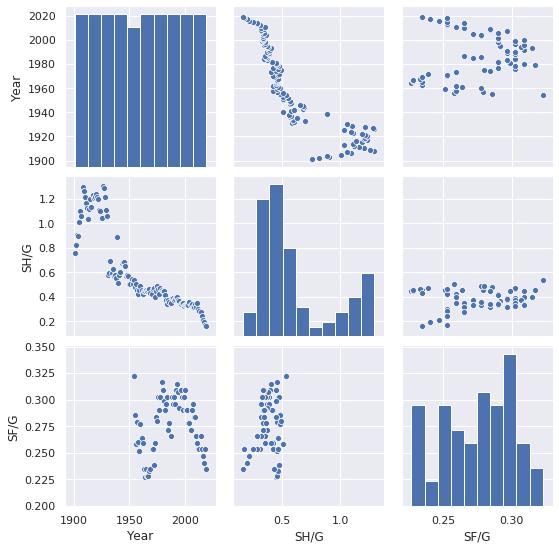

In [21]:
sb_df = pd.concat([bat_rate_df['Year'],bat_rate_df['SH/G'],
                   bat_rate_df['SF/G']],axis=1)
sns.pairplot(sb_df)

So what you're telling me is that Whitey Herzog was really calling for sacrifice flies, not particularly for bunts. Did not suspect that. Thought I could throw away sacrifice flies... guess not.

Now what I will do is, in each notebook, haul in attendance and add that column to the pairplots. I might also try the derivative of attendance. Both of those have problems (expansion teams...), but hey, here we are in the real world.

In [22]:
with open('bb-int.pkl','rb') as cellar:
    att_df = pickle.load(cellar)

In [23]:
att_df.columns

Index(['Pop', 'ASG Network', 'ASG Ratings', 'ASG Share', 'ASG Households',
       'ASG Viewers', 'WS Network', 'WS Ratings', 'WS Share', 'WS Viewers',
       'Tms', 'G', 'Time', 'Time/9I', 'Inn', 'Inn%', 'R/G', 'PA/G',
       'Pitches/PA', 'Batters/G', 'Pitchers/G', 'PH/G', 'PR/G', 'Batters/S',
       'Pitchers/S', 'Attendance', 'Attend/G', 'Lg Payroll*', 'Payroll/Tm*',
       'NormAtt', 'NormAtt/G'],
      dtype='object')

Contact hitting.

In [27]:
cont_df['Att']=att_df['NormAtt/G']*1000000

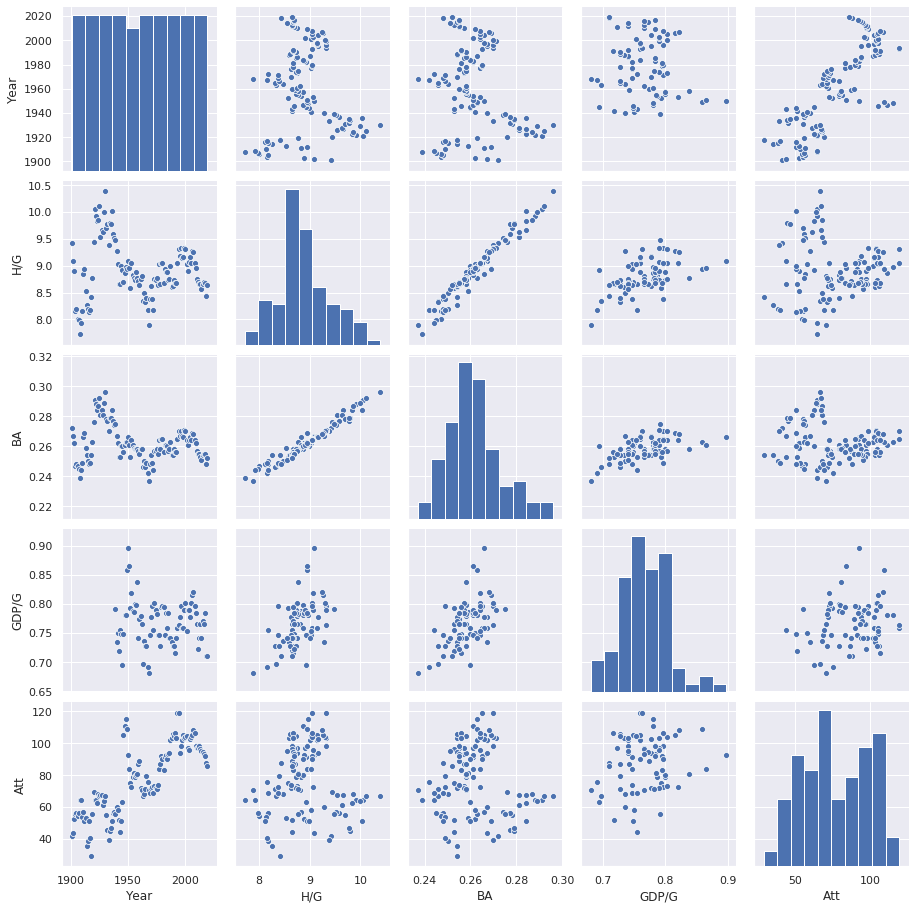

In [28]:
sns.pairplot(cont_df)

Power hitting.

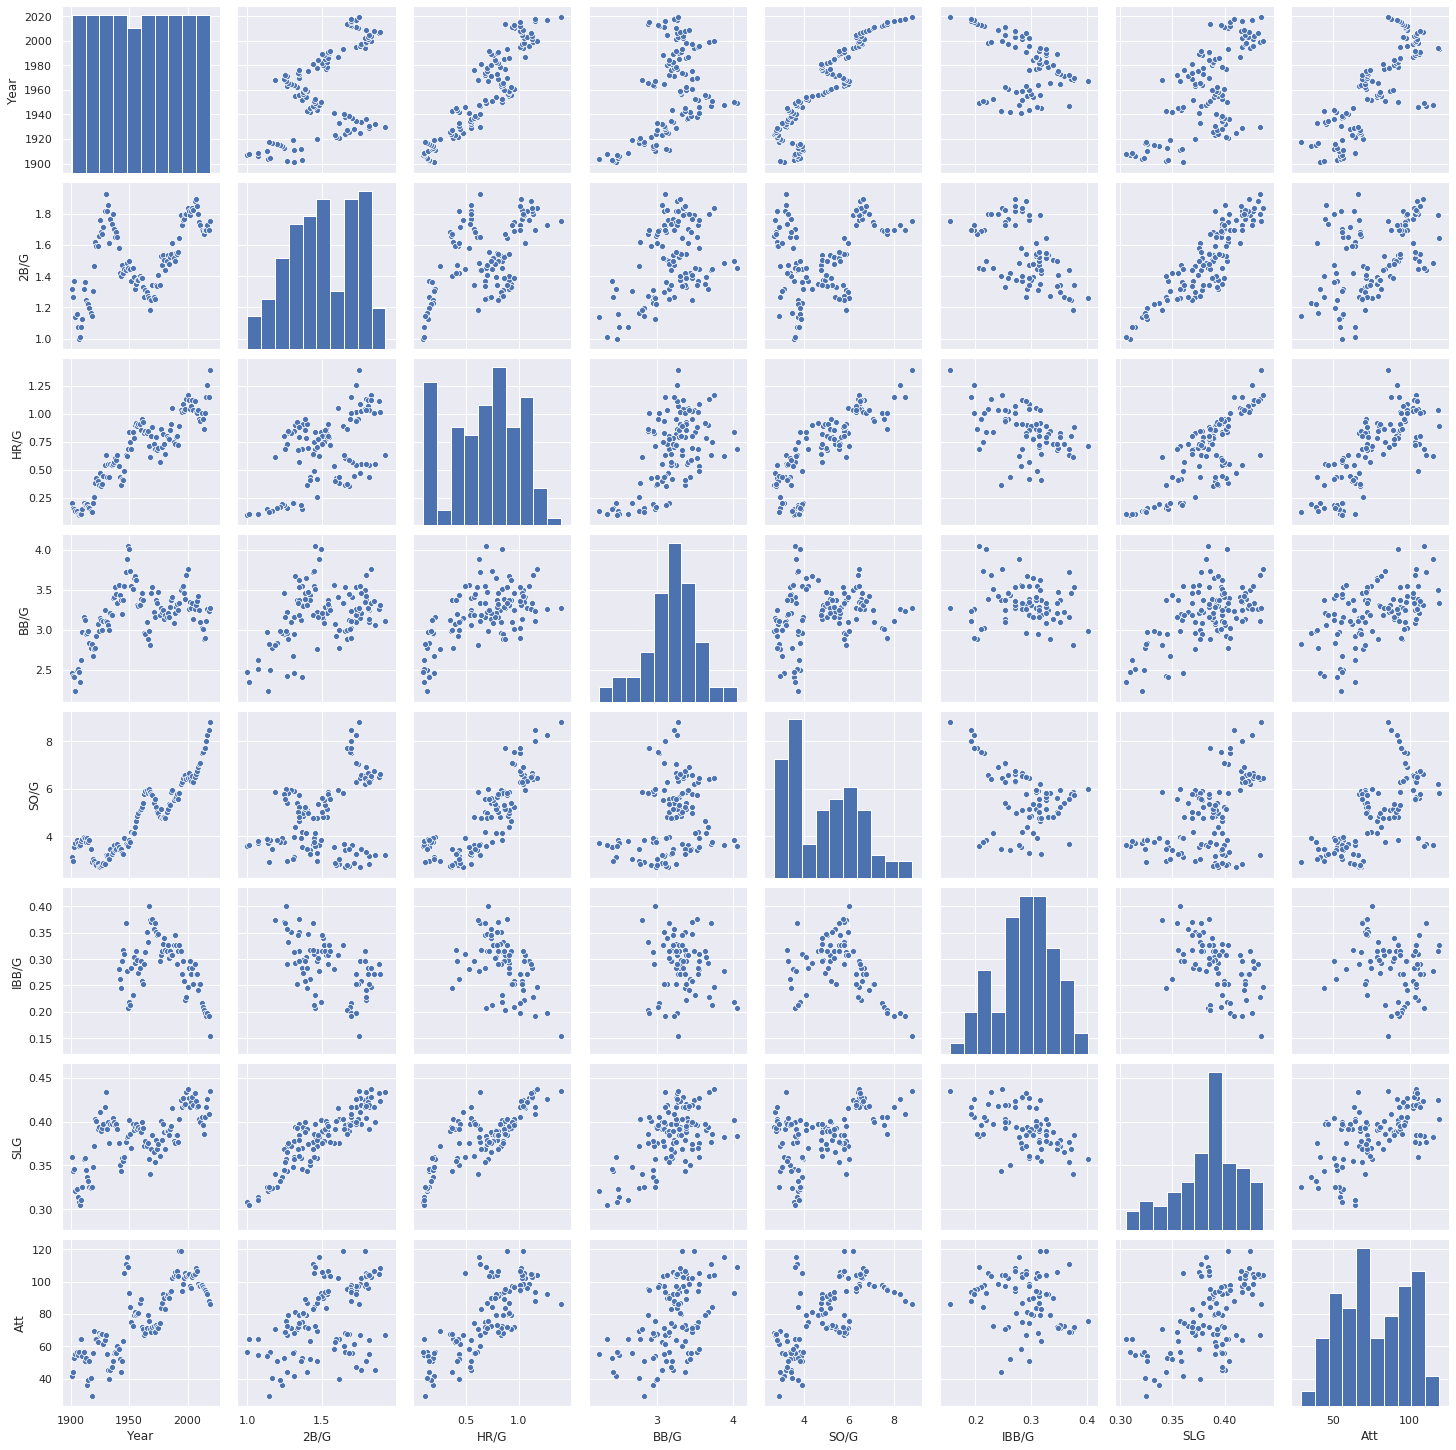

In [29]:
power_df['Att']=cont_df['Att']
sns.pairplot(power_df)

In [30]:
att_df['Time/9I']

Year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905     NaN
        ... 
2015    2:56
2016    3:00
2017    3:05
2018    3:00
2019    3:05
Name: Time/9I, Length: 119, dtype: object

In [32]:
gmtime_df=att_df['Time/9I'].str.split(pat=':',n=2,expand=True)

In [34]:
gmtime_df.tail()

,0,1
Year,,
2015,2,56
2016,3,00
2017,3,05
2018,3,00
2019,3,05


In [35]:
att_df['GmDur']=gmtime_df[0].astype(float)+gmtime_df[1].astype(float)/60

In [36]:
att_df.tail()

,Pop,ASG Network,ASG Ratings,ASG Share,ASG Households,ASG Viewers,WS Network,WS Ratings,WS Share,WS Viewers,Tms,G,Time,Time/9I,Inn,Inn%,R/G,PA/G,Pitches/PA,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*,NormAtt,NormAtt/G,GmDur
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,320640000.0,FOX,6.6,12.0,"9,127,000","10,900,000",FOX,8.6,16.0,"14,533,000",30.0,2429.0,3:00,2:56,212.0,8.73,8.50,75.6,3.83,10.4,4.11,1.16,0.18,24.5,27.0,73719340.0,30349.0,$3680887206.00,$122696240.00,0.229913,0.000095,2.933333
2016,322940000.0,FOX,5.4,10.0,"5,981,000","8,707,000",FOX,12.9,22.0,"22,847,000",30.0,2428.0,3:04,3:00,185.0,7.62,8.96,76.0,3.88,10.4,4.15,1.12,0.16,24.2,27.5,73159044.0,30131.0,$3761011880.00,$125367062.00,0.226541,0.000093,3.000000
2017,324990000.0,FOX,5.5,11.0,"7,312,000","9,280,000",FOX,10.6,20.0,"18,705,000",30.0,2430.0,3:08,3:05,182.0,7.49,9.29,76.2,3.89,10.3,4.22,1.13,0.15,24.2,28.0,72678797.0,29908.0,$3983892634.00,$132796421.00,0.223634,0.000092,3.083333
2018,326690000.0,NaN,NaN,NaN,NaN,NaN,FOX,8.3,17.0,"14,125,000",30.0,2431.0,3:04,3:00,216.0,8.89,8.90,76.1,3.90,10.4,4.36,1.16,0.16,24.7,29.7,69671272.0,28659.0,$3964096903.00,$132136563.00,0.213264,0.000088,3.000000
2019,328240000.0,NaN,NaN,NaN,NaN,NaN,FOX,8.1,16.0,"13,912,000",30.0,2429.0,3:10,3:05,208.0,8.56,9.66,76.8,3.93,10.3,4.41,1.18,0.14,24.9,31.0,68494752.0,28198.0,$3999827072.00,$133327569.00,0.208673,0.000086,3.083333


In [40]:
att_df.dtypes

Pop               float64
ASG Network        object
ASG Ratings       float64
ASG Share         float64
ASG Households     object
ASG Viewers        object
WS Network         object
WS Ratings        float64
WS Share          float64
WS Viewers         object
Tms               float64
G                 float64
Time               object
Time/9I            object
Inn               float64
Inn%              float64
R/G               float64
PA/G              float64
Pitches/PA        float64
Batters/G         float64
Pitchers/G        float64
PH/G              float64
PR/G              float64
Batters/S         float64
Pitchers/S        float64
Attendance        float64
Attend/G          float64
Lg Payroll*        object
Payroll/Tm*        object
NormAtt           float64
NormAtt/G         float64
GmDur             float64
dtype: object

In [45]:
vis_df = pd.concat([bat_df['Year'],att_df['ASG Ratings'],att_df['WS Ratings'],
                   att_df['Pitches/PA'],att_df['Pitchers/G']
                   ,att_df['GmDur']
                    ,att_df['NormAtt/G']*10**6],axis=1)

In [46]:
vis_df.tail()

,Year,ASG Ratings,WS Ratings,Pitches/PA,Pitchers/G,GmDur,NormAtt/G
2015,2015.0,6.6,8.6,3.83,4.11,2.933333,94.651322
2016,2016.0,5.4,12.9,3.88,4.15,3.000000,93.302161
2017,2017.0,5.5,10.6,3.89,4.22,3.083333,92.027447
2018,2018.0,NaN,8.3,3.90,4.36,3.000000,87.725367
2019,2019.0,NaN,8.1,3.93,4.41,3.083333,85.906654


In [60]:
att_df['Year']=vis_df['Year']

Text(0, 0.5, 'Attendance / Game')

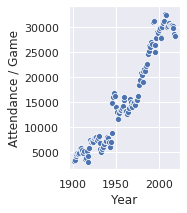

In [61]:
plt.figure(figsize=(2,3))
plt.title='MLB Attendance History\n(baseball-reference.com)'
sns.scatterplot(data=att_df,x='Year',y='Attend/G')
plt.xlabel('Year')
plt.ylabel('Attendance / Game')

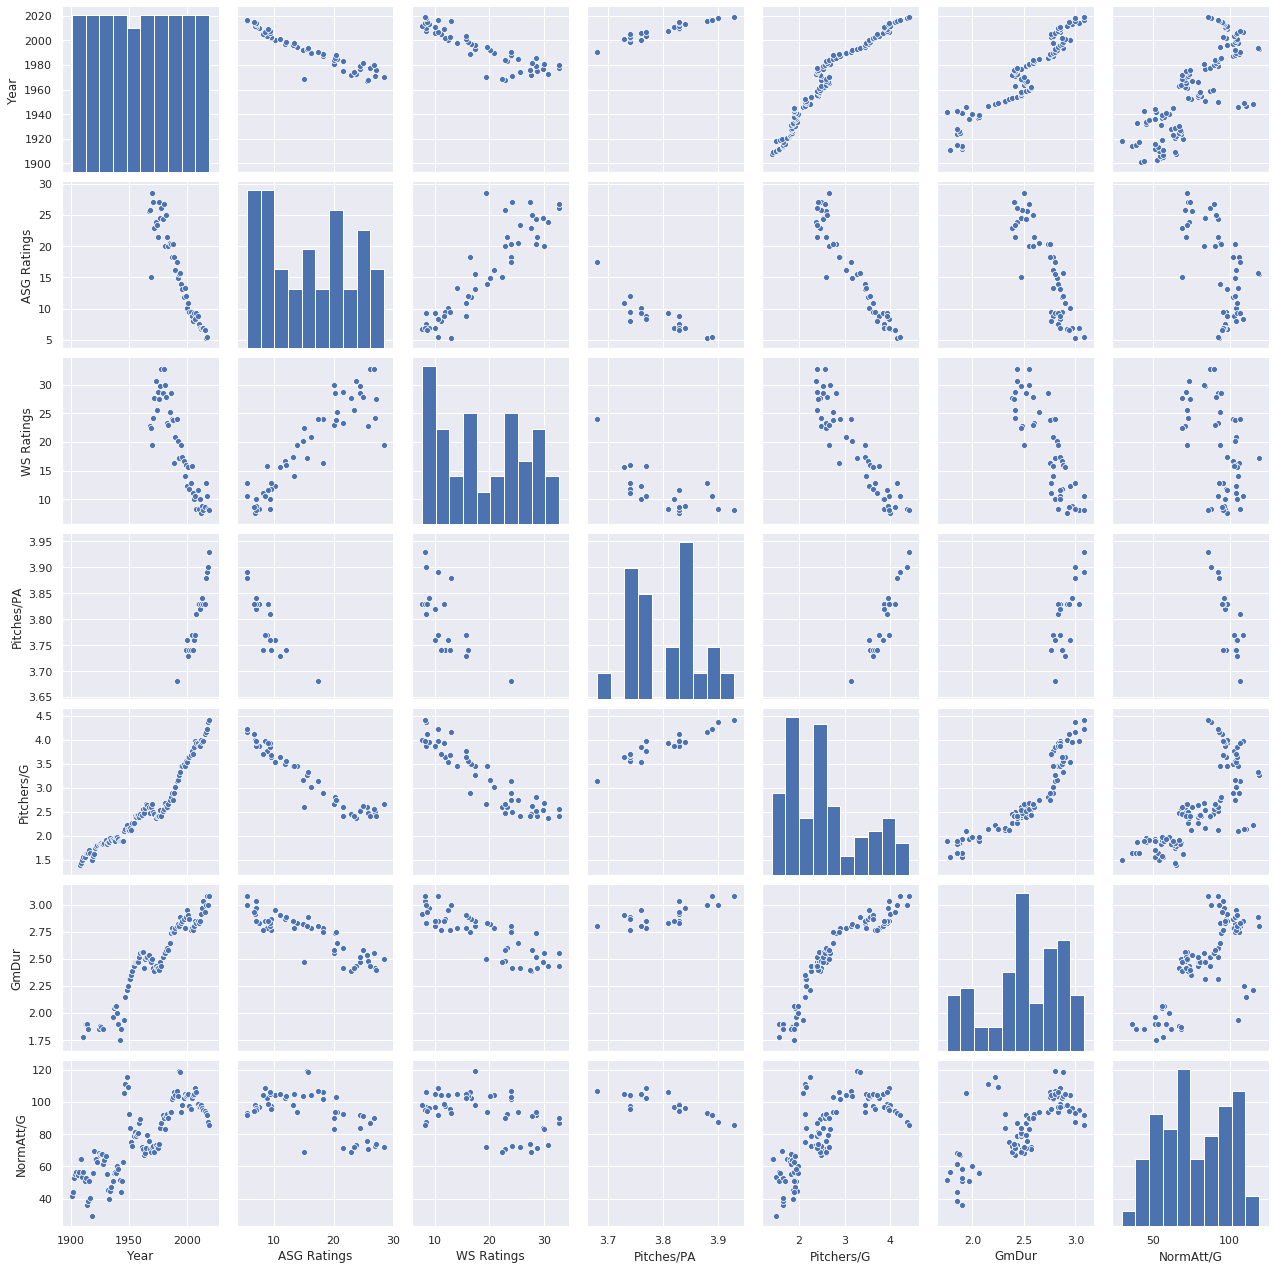

In [47]:
sns.pairplot(vis_df)

Interesting arch in the pitchers/game versus attendance plot. Can't really use pitches/PA since there's so little data. True to a lesser extent for game duration as well. Looks like attendance, P/G, GmDur from this plot.

Speed.

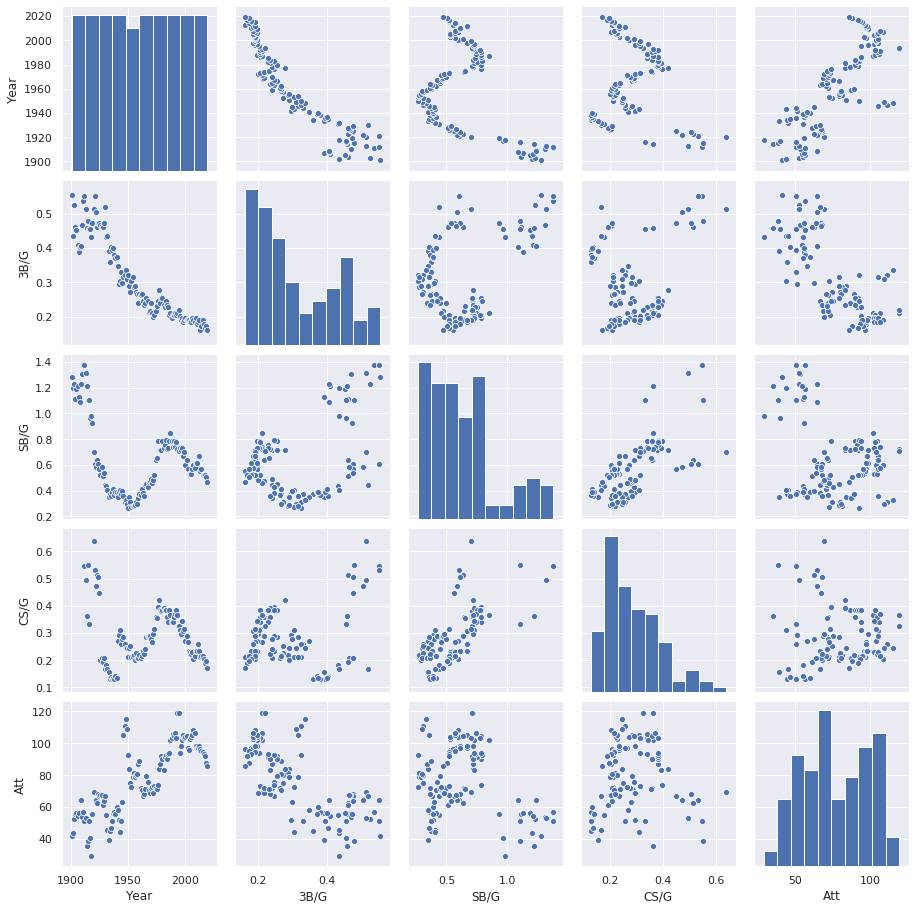

In [48]:
sp_df['Att']=cont_df['Att']
sb_df['Att']=cont_df['Att']
sns.pairplot(sp_df)

I mean, triples are so boring. No, seriously, maybe I should be doing a smoothed / moving average derivative of attendance rather than bulk attendance.

Small ball.

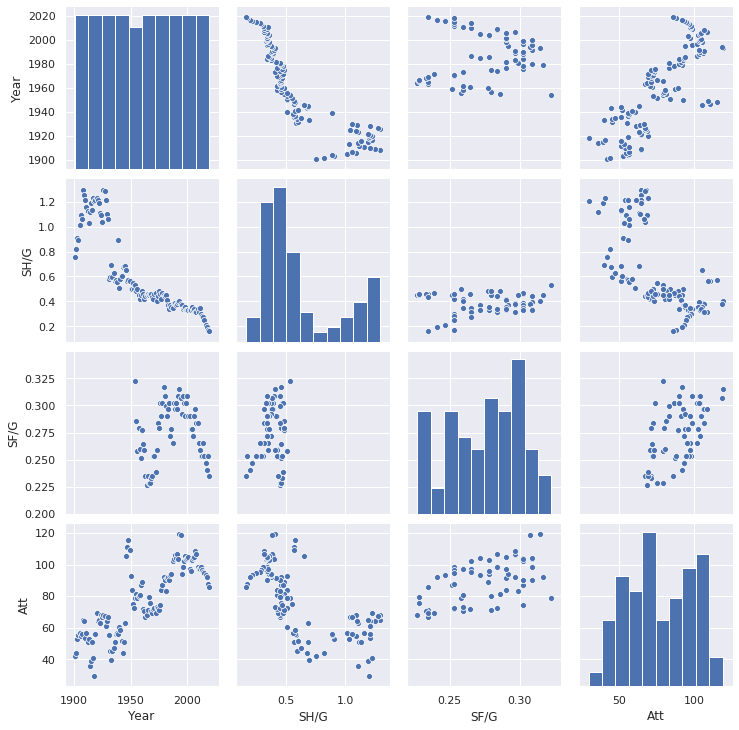

In [49]:
sns.pairplot(sb_df)

I mean, people DO hate bunts, right?

In [50]:
with open('sp.pkl','wb') as cellar:
    pickle.dump(sp_df, cellar)
with open('sb.pkl','wb') as cellar:
    pickle.dump(sb_df, cellar)
with open('att.pkl','wb') as cellar:
    pickle.dump(vis_df, cellar)